# PHAS0029 Session 9 Task:
# Normal modes of beads connected by springs

_Script Author: louise.dash@ucl.ac.uk    
Updated: 10/03/2021_

You are going to calculate the normal modes of vibration of a system of $N$ beads connected by $N+1$ Hookean springs to fixed end points. The beads are able to move horizontally but not vertically. This provides us with a basic but useful model of vibrations in a solid, where the beads represent atoms and the springs the interatomic bonds.

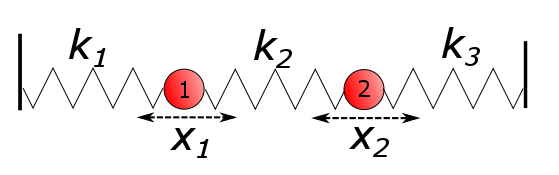

In [1]:
#from IPython.display import Image # needed to embed an image
#Image(filename='3springs2beads.png', embed=True)
# This image file is on Moodle. 
# It will appear here if you downloaded the image and it's in the same folder as this notebook!

First consider a system of just two beads, labelled 1 and 2, connected by three springs with spring constants $k_1$, $k_2$, $k_3$ to two fixed end points, as in the figure above. The displacement of each bead from its equilibrium position is given by $x_1$ and $x_2$, as shown. By considering each spring individually, we can see that the forces exerted by the springs are:

**Spring 1** exerts a force $-k_1 x_1$ on bead 1.

**Spring 2** exerts a force $-k_2(x_1 - x_2)$ on bead 1 and a force $-k_2(x_2 - x_1)$ on bead 2.

**Spring 3** exerts a force $-k_3 x_2$ on bead 2.

We can then write the total forces on the beads in the form of a matrix equation:

$$
\mathbf{F} =-\mathbf{K}\cdot \mathbf{x} = -\begin{pmatrix}
    k_1 + k_2 & -k_2 \\
    -k_2 & k_2 + k_3 
  \end{pmatrix}
  \begin{pmatrix}
   x_1 \\ x_2 \end{pmatrix}
$$

This can easily be extended to a system of $N$ beads with $N+1$ springs, which gives us a [tridiagonal](http://en.wikipedia.org/wiki/Tridiagonal_matrix) matrix for the spring constants $k_i$:

$$ \mathbf{K} = 
\begin{pmatrix}
k_1 + k_2 & -k_2 & 0 &  & \ldots &  0  \\
-k_2 & k_2 + k_3 & -k_3 & & \ldots &0 \\
 0 & -k_3 & k_3 + k_4 & -k_4 & \ldots & 0 \\
\vdots &  & \ddots & & & \vdots \\
0 & 0 & \ldots &  & -k_N & k_N + k_{N+1} \\
\end{pmatrix}
$$

We also know that for a harmonic oscillator, the spring constants are related to the angular frequency by

$$ k = m \omega^2 $$

and hence when we represent this in matrix form, we have

$$ -\mathbf{K}\mathbf{x} = -m \omega^2\mathbf{x} $$

which is an eigenvalue equation of the form $\mathbf{A} \mathbf{x} = \lambda \mathbf{x}$, where the eigenvectors of the matrix $\mathbf{K}$ will give us the bead displacements for the normal modes of vibration, and the eigenvalues the angular frequency of that mode, i.e. $\lambda = m \omega^2$.

## Your task:

Complete this notebook by doing the following. Make sure you read through the full set of instructions before starting!
    
### 1. Construct the matrix $\mathbf{K}$. 
* *Hint 1a:* It may be easier to construct a one-dimensional vector of $k_i$ and then use the [np.diag](http://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html) function to construct the diagonal and off-diagonal elements of $\mathbf{K}$ separately. As you'll see below, you'll need to use different values of $k_i$ in this task so it's worth putting some thought into making your code here as general as possible.
* *Hint 1b:* Look at the documentation for `np.diag` in the link above and note the optional argument `k` - this will help you construct the off-diagonal elements.
* *Hint 2:* It will be easier to debug this if you start with a small value of $N$, less than 5 or so.
* *Useful to know:* `np.set_printoptions` will allow you to pretty-print matrices on the screen, which is useful when you are testing and debugging. Try `np.set_printoptions(threshold=2000, linewidth=110,suppress=True)  `, which should work well for matrices when N<=25. Adjust the linewidth if you go above this and still want to view the whole matrix (may not work so well on smaller screens).
      
### 2. Find the eigenvalues and eigenvectors of $\mathbf{K}$.
* *Useful to know:* you may want to reset your `np.set_printoptions` in this cell, if you set it above. A good setting to try here is: `np.set_printoptions(threshold=100, precision=4)` - can you see what effect the "precision" setting has?


### 3. Calculate the angular frequency $\omega$ of each normal mode, and plot it as a function of the mode number.
* *Hint:* The first mode has mode number 1, not 0. You'll need to create a separate x-array going from 1 to N+1 to use to plot the array of angular frequencies correctly.

### 4. Plot the bead displacements as a function of bead number for each of the three lowest normal modes, on a single plot.
* *Useful to know:* <tt>plt.axhline(c='k',ls=':',lw=0.5)</tt> will plot a fine black dotted line at the zero-y-axis

In the first instance, calculate for a system of 25 identical beads with mass $m=1$ and 26 identical springs each with spring constant $k_i = 1$ (_Yet another hint: [np.ones()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)_ )

Once you are satisfied that your solution is correct, rerun the notebook for a system of 25 identical beads connected by springs which each have a spring constant $k_i = i$, (_where "i" is the integer index of the array, not $\sqrt{-1}$!_).

You should only have to change a few lines of code to do this - keep the original code in place, commented out. **Use your results of your calculations with $k_i = 1$ to inform your text cell discussion of the calculation with $k_i = i$**.



Remember to use text cells to describe the maths/physics of what you're doing and discuss your results, and code comments to annotate the code.

#### OPTIONAL extension (not graded): 
If you have time, also try calculating for a system where the strength of the springs alternate between weak and strong, or any other configuration you like! If you do this, make sure you have a clear separation between your code and text for the main task and the code and text for this optional, ungraded part.

## Your solution goes here:

In [2]:
import numpy as np
import numpy.linalg as la
%matplotlib notebook
import matplotlib.pyplot as plt

np.set_printoptions(threshold=2000, linewidth=110,suppress=True)#as recommended above

In [9]:
N = 5#test small matrix

k = np.arange(1,N+2)#k 1D array with N+1 elements, dummy values added to test
#k1, k2, ... kn+1
print(k)
k_n = k[:N]#array of k1, k2, ... kn
print(k_n)
k_n1 = k[1:]#array of k2, k3, ... kn+1
print(k_n1)

print(-k[1:N])

#diagonal and off diagonal elements
dia = k_n + k_n1#array of k1+k2, k2+k3, .... kn + kn+1 
print(dia)
off_diag = -k[1:N]# 1 D array of off-diagonal elements -k2, -k3, ...-kn

K_above = np.diag(off_diag, k=1)#matrix with just offdiagonal elements above
K_below = np.diag(off_diag, k=-1)#matrix with just offdiagonal elements below
K_diag = np.diag(dia, k=0)#matrix with diagonal elements
print(K_diag)
print(K_above)

K= K_above + K_below + K_diag#desired matrix K

print(K)


[1 2 3 4 5 6]
[1 2 3 4 5]
[2 3 4 5 6]
[-2 -3 -4 -5]
[ 3  5  7  9 11]
[[ 3  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 11]]
[[ 0 -2  0  0  0]
 [ 0  0 -3  0  0]
 [ 0  0  0 -4  0]
 [ 0  0  0  0 -5]
 [ 0  0  0  0  0]]
[[ 3 -2  0  0  0]
 [-2  5 -3  0  0]
 [ 0 -3  7 -4  0]
 [ 0  0 -4  9 -5]
 [ 0  0  0 -5 11]]


Test worked and code from line 5 can be used generally. Just need to input values in k array. N could be calculated as len(k)-1

In [13]:
np.set_printoptions(threshold=2000, linewidth=110,suppress=True)
#example 1
N = 25#25 identical beads
m = 1#mass of each bead
#k = 1 for all 26 springs

k = np.ones(N+1)#from above hint
print(k)

#code copied from above test cell
k_n = k[:N]#array of k1, k2, ... kn
k_n1 = k[1:]#array of k2, k3, ... kn+1

#diagonal and off diagonal elements
dia = k_n + k_n1#array of k1+k2, k2+k3, .... kn + kn+1 
off_diag = -k[1:N]# 1 D array of off-diagonal elements -k2, -k3, ...-kn

K_above = np.diag(off_diag, k=1)#matrix with just offdiagonal elements above
K_below = np.diag(off_diag, k=-1)#matrix with just offdiagonal elements below
K_diag = np.diag(dia, k=0)#matrix with diagonal elements

K= K_above + K_below + K_diag#desired matrix K

print(K)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

Matrix seems to have been calculated correctly with 2's on the diagonal, -1's on the off diagonals

In [14]:
np.set_printoptions(threshold=100, precision=4)#as recommended above
#adapted from PHAS0029 Session09
eigval, eigvec = np.linalg.eigh(K)

print("has eigenvalues \n", eigval)
print("\nand corresponding eigenvectors\n", eigvec)
print("\nThe first eigenvector is", eigvec[:,0], "\nWith corresponding eigenvalue", eigval[0])

25
has eigenvalues 
 [0.0146 0.0581 0.13   0.2291 0.354  0.503  0.6738 0.8639 1.0706 1.2908 1.5214 1.7589 2.     2.2411 2.4786
 2.7092 2.9294 3.1361 3.3262 3.497  3.646  3.7709 3.87   3.9419 3.9854]

and corresponding eigenvectors
 [[ 0.0334 -0.0664 -0.0983 ... -0.0983  0.0664 -0.0334]
 [ 0.0664 -0.1289 -0.1839 ...  0.1839 -0.1289  0.0664]
 [ 0.0983 -0.1839 -0.2456 ... -0.2456  0.1839 -0.0983]
 ...
 [ 0.0983  0.1839 -0.2456 ... -0.2456 -0.1839 -0.0983]
 [ 0.0664  0.1289 -0.1839 ...  0.1839  0.1289  0.0664]
 [ 0.0334  0.0664 -0.0983 ... -0.0983 -0.0664 -0.0334]]

The first eigenvector is [0.0334 0.0664 0.0983 0.1289 0.1576 0.1839 0.2076 0.2283 0.2456 0.2593 0.2693 0.2753 0.2774 0.2753 0.2693
 0.2593 0.2456 0.2283 0.2076 0.1839 0.1576 0.1289 0.0983 0.0664 0.0334] 
With corresponding eigenvalue 0.014582251803891855


It seems to have worked. Precision has been set to show 4dp. Now Calculate $\omega$ from $\lambda = m \omega^2$

<IPython.core.display.Javascript object>


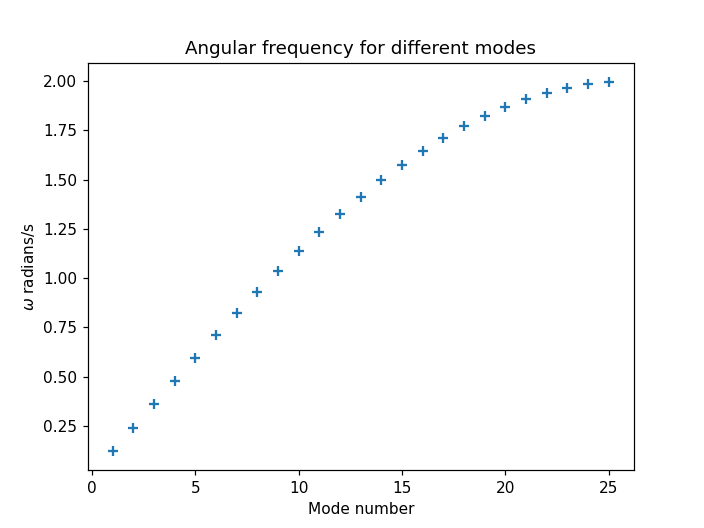

In [96]:
x = np.arange(1, N+1)#from hint - mode numbers from 1 to 25
omega = np.sqrt(eigval/m)#re-arrangement for calc of omega values
plt.figure()
plt.scatter(x,omega, marker="+")
plt.title("Angular frequency for different modes")
plt.xlabel("Mode number")
plt.ylabel("$\omega$ radians/s");


<IPython.core.display.Javascript object>


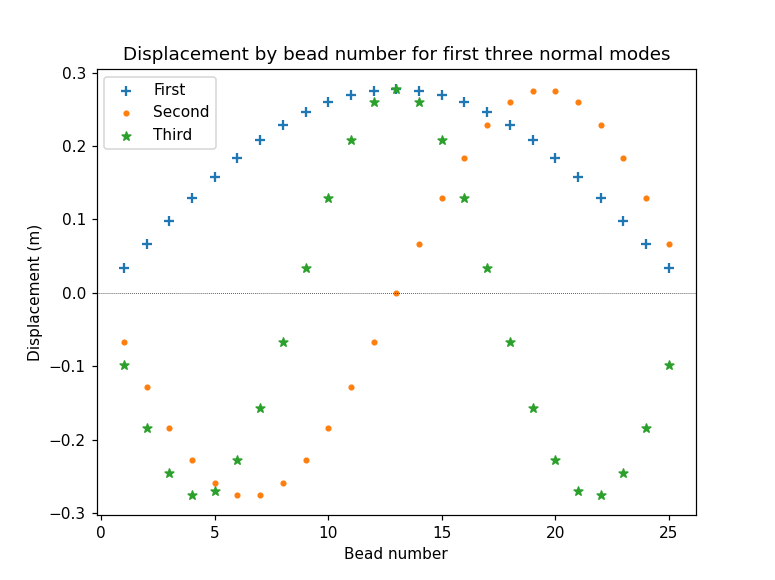

In [115]:
x_1 = eigvec[:,0]# first eigenvector
x_2 = eigvec[:,1]# second eigenvector
x_3 = eigvec[:,2]# third eigenvector
plt.figure()
plt.scatter(x, x_1, marker="+", label ="First")
plt.scatter(x, x_2, marker=".", label ="Second")
plt.scatter(x, x_3, marker="*", label ="Third")

plt.title("Displacement by bead number for first three normal modes")
plt.xlabel("Bead number")
plt.ylabel("Displacement (m)")
plt.legend()



plt.axhline(c='k',ls=':',lw=0.5);

In [116]:
np.set_printoptions(threshold=2000, linewidth=110,suppress=True)
#example 2
N = 25#25 identical beads
m = 1#mass of each bead


#k = np.ones(N+1)#from above hint
k = np.arange(1,N+2)#k 1D array with N+1 elements, dummy values added to test
#k1, k2, ... kn+1

#code copied from above test cell
k_n = k[:N]#array of k1, k2, ... kn
k_n1 = k[1:]#array of k2, k3, ... kn+1

#diagonal and off diagonal elements
dia = k_n + k_n1#array of k1+k2, k2+k3, .... kn + kn+1 
off_diag = -k[1:N]# 1 D array of off-diagonal elements -k2, -k3, ...-kn

K_above = np.diag(off_diag, k=1)#matrix with just offdiagonal elements above
K_below = np.diag(off_diag, k=-1)#matrix with just offdiagonal elements below
K_diag = np.diag(dia, k=0)#matrix with diagonal elements

K= K_above + K_below + K_diag#desired matrix K

print(K)


[[  3  -2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ -2   5  -3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  -3   7  -4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  -4   9  -5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  -5  11  -6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  -6  13  -7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  -7  15  -8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  -8  17  -9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  -9  19 -10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 -10  21 -11   0   0   0   0   0   0   0

above seems to be working as expected

In [117]:
np.set_printoptions(threshold=100, precision=4)#as recommended above
#adapted from PHAS0029 Session09
eigval, eigvec = np.linalg.eigh(K)
print("has eigenvalues \n", eigval)
print("\nand corresponding eigenvectors\n", eigvec)
print("\nThe first eigenvector is", eigvec[:,0], "\nWith corresponding eigenvalue", eigval[0])

has eigenvalues 
 [ 0.1177  0.4928  1.1107  1.9548  3.0059  4.248   5.6745  7.2919  9.1142 11.1555 13.4285 15.9455 18.7207
 21.7708 25.1161 28.7816 32.7987 37.207  42.0586 47.4239 53.4022 60.1428 67.8915 77.118  89.0284]

and corresponding eigenvectors
 [[ 0.1531 -0.285  -0.3895 ... -0.      0.      0.    ]
 [ 0.2206 -0.3573 -0.3679 ...  0.     -0.     -0.    ]
 [ 0.257  -0.3468 -0.2173 ... -0.      0.      0.    ]
 ...
 [ 0.0448  0.0886 -0.1271 ...  0.1616 -0.0616  0.5427]
 [ 0.0294  0.0589 -0.0862 ...  0.2141  0.3529 -0.552 ]
 [ 0.0144  0.0291 -0.0432 ... -0.3169 -0.3378  0.3629]]

The first eigenvector is [0.1531 0.2206 0.257  0.2767 0.286  0.2881 0.285  0.2782 0.2685 0.2566 0.243  0.2282 0.2124 0.196  0.1792
 0.1621 0.1448 0.1276 0.1105 0.0936 0.077  0.0607 0.0448 0.0294 0.0144] 
With corresponding eigenvalue 0.11765678894098246


<IPython.core.display.Javascript object>


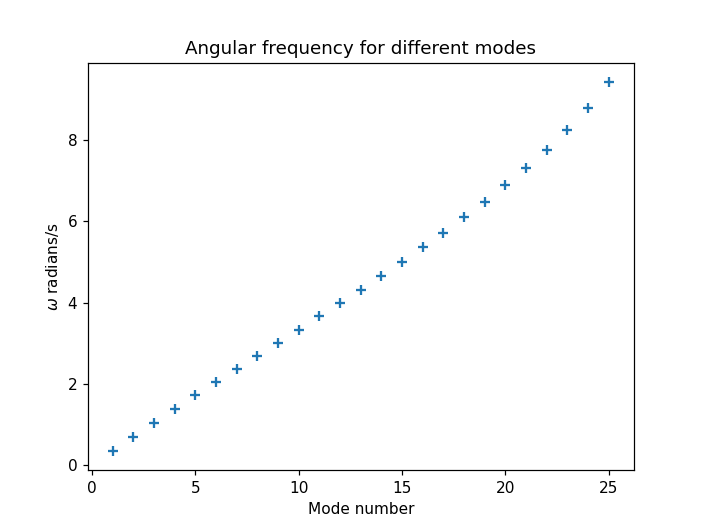

In [119]:
x = np.arange(1, N+1)#from hint - mode numbers from 1 to 25
omega = np.sqrt(eigval/m)#re-arrangement for calc of omega values
plt.figure()
plt.scatter(x,omega, marker="+")
plt.title("Angular frequency for different modes")
plt.xlabel("Mode number")
plt.ylabel("$\omega$ radians/s");


<IPython.core.display.Javascript object>


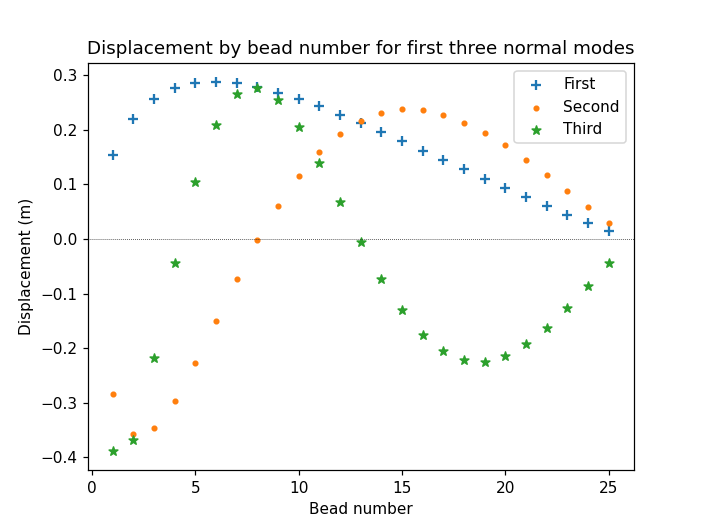

In [118]:
x_1 = eigvec[:,0]# first eigenvector
x_2 = eigvec[:,1]# second eigenvector
x_3 = eigvec[:,2]# third eigenvector
plt.figure()
plt.scatter(x, x_1, marker="+", label ="First")
plt.scatter(x, x_2, marker=".", label ="Second")
plt.scatter(x, x_3, marker="*", label ="Third")

plt.title("Displacement by bead number for first three normal modes")
plt.xlabel("Bead number")
plt.ylabel("Displacement (m)")
plt.legend()



plt.axhline(c='k',ls=':',lw=0.5);

As bead number increases, k increases. Overall k values are higher so angular frequencies for the different modes are higher across the range. The higher numbered beads are attached to tighter springs. This causes the following effects: i) non symmetric plot versus when all k's = 1, ii) amplitudes of displacement curves less for higher bead numbers, iii) curves are similar in that they each have same number of mins and maxs. when k=i, they are shifted to lower bead numbers as oscillations are easier due to lower k values